# Etude autour du paradoxe de Simpson¶

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé mais ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

L'ensemble de ces données est disponible dans le fichier 'SmokingNotSmokingWomen_InputData.csv'. 
Pour info, sur chaque ligne du fichier 'SmokingNotSmokingWomen_InputData.csv', on trouve  (Smoker,Status,Age) :
si la personne fume ou non, si elle est vivante ou décédée au moment de la seconde étude, et quel était son âge lors du premier sondage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## I - Chargement des données et controle si leur contenu est valide + extraction de quelques informations générales :

Remarque préliminaire : 
* Pour se protéger contre une éventuelle disparition ou modification du serveur ou des fichiers qu'il abrite, 
faire une copie locale de ce jeux de données qui sera préservée avec l'analyse qui va en etre faite. 
* On télécharge les données depuis le WEB seulement si la copie locale n'existe pas.

In [2]:
# Sur le WEB : 
# * lien permanent du fichier de données  :
#data_url="https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/blob/e06310de87a61ee756949895d588e65334b0bfc9/module3/Practical_session/Subject6_smoking.csv"
# * lien actualisé du fichier de données  :
data_url="https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/raw/master/module3/Practical_session/Subject6_smoking.csv"

#  Chemin vers une copie locale de ce fichier :  
LocalInputData="" # "C:/Users/hpascalj/__DataSets/module3_Practical_session_Subject6_smoking.csv"

In [3]:
# Chargement du jeu de données originales :
# -----------------------------------------
import os
import urllib.request
if not os.path.exists(LocalInputData):
    print ("the specified local data-file is not available; by default, select the data-file available at the prescribed url !")
    urllib.request.urlretrieve(data_url, LocalInputData)
    OriginalInputData=pd.read_csv(data_url)  # ainsi possible avec une version de pandas >= 0.19.2
else :
    print ("usage of the LocalInputData = ", LocalInputData)

the specified local data-file is not available; by default, select the data-file available at the prescribed url !


In [4]:
print ("le nb d'enregistrements = ",OriginalInputData.shape, " = (nb_lignes='features-values' , nb_colonnes='features')")
#
# InputData_index = OriginalInputData.index
# InputData_columns = OriginalInputData.columns
# print ("InputData : indexe des colonnes = ",InputData_columns)
# print ("InputData : indexe des lignes = ",InputData_index)
#
OriginalInputData.head(10)

le nb d'enregistrements =  (1314, 3)  = (nb_lignes='features-values' , nb_colonnes='features')


Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4
5     No  Alive  36.8
6     No  Alive  23.8
7    Yes   Dead  57.5
8    Yes  Alive  24.8
9    Yes  Alive  49.5

### Verification qu'il n'y a pas de points manquants dans ce jeux de données :

In [5]:
OriginalInputData[OriginalInputData.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Toutes les entregistrements sont dans un état valide. 

In [6]:
## Remarque 
## Les donnees peuvent etre triées par valeurs croissantes de l'age , pour les lister aisement par tranches d'age
## Mais ce n'est pas absolument necessaire !  Donc on n'active pas cette option pour la suite :
#sortedData = OriginalInputData.set_index('Age').sort_index()
#sortedData.head(25)  #  shows the first 25 lines of records

### Affichons quelques informations générales quant à la distribution des ages :

In [7]:
Age = OriginalInputData['Age']
# Soit utiliser la fonction suivante   objet.describe() 
# Age.describe()
# Ou bien :
AgeMax= np.max(Age); AgeMin= np.min(Age); AgeMoy= np.mean(Age) ; AgeMedian = np.median(Age) ; ecartType=np.std(Age)
print (" Age  min = % 3d" % AgeMin)
print (" Age  max = % 3d" % AgeMax)
print (" Age  moyen = % 3d" % AgeMoy)
print (" Age  median = % 3d" % AgeMedian)
print (" Age  ecartType = % 4.2f" %ecartType)

 Age  min =  18
 Age  max =  89
 Age  moyen =  47
 Age  median =  44
 Age  ecartType =  19.15


### Dénombrons les nombres de femmes fumeuses et non fumeuses, de femmes vivantes et de mortes :

In [8]:
# Vérifions le contenu de la sous-liste de données  qui contient 2 données binaires 'Yes' ou 'No' :
Fumeuse_ou_non = OriginalInputData['Smoker']
Fumeuse_ou_non.describe()

count     1314
unique       2
top         No
freq       732
Name: Smoker, dtype: object

On voit que, sur 1314 femmes, il y a 732 specimens du type 'No' ;   
donc on peut en déduire qu'il y a  1314-732 = 582 fumeuses

In [9]:
# Vérifions le contenu de la sous-liste de données  qui contient 2 données binaires 'Dead' ou 'Alive' :
Vivante_ou_Morte = OriginalInputData['Status']
Vivante_ou_Morte.describe()

count      1314
unique        2
top       Alive
freq        945
Name: Status, dtype: object

On voit que, sur 1314 femmes, il y a 945 specimens du type 'Alive' ;   
donc on peut en déduire qu'il y a  1314-945=369 femmes decedees, qu'elles aient été fumeuses ou non

## II - Calculons dans chaque groupe (fumeuses, non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe avec le nombre total de femmes dans ce groupe)

In [10]:
# selection des lignes du DataFrame Fumeuse_ou_non en fonction de la valeur 'Yes' dans la colonne descriptive 'Smoker':
Fumeuses = OriginalInputData.loc[OriginalInputData['Smoker'] == 'Yes']
Fumeuses.head(10)

Smoker Status   Age
0     Yes  Alive  21.0
1     Yes  Alive  19.3
4     Yes  Alive  81.4
7     Yes   Dead  57.5
8     Yes  Alive  24.8
9     Yes  Alive  49.5
10    Yes  Alive  30.0
12    Yes  Alive  49.2
19    Yes  Alive  65.7
21    Yes  Alive  38.3

In [11]:
Nb_Fumeuses = Fumeuses.shape[0]  # donne le nombre de lignes dans Fumeuses
# print ("Nb_Fumeuses=",Nb_Fumeuses)
FumeusesVivantes = OriginalInputData.loc[(OriginalInputData['Smoker'] == 'Yes') & (OriginalInputData['Status'] == 'Alive')]
Nb_FumeusesVivantes = FumeusesVivantes.shape[0]  # donne le nombre de lignes dans FumeusesVivantes
# count_col = Fumeuses_Vivantes.shape[1]  #  donne le nombre de colonnes dans FumeusesVivantes
Nb_FumeusesMortes = Nb_Fumeuses - Nb_FumeusesVivantes
print ("Nb Fumeuses Mortes=",Nb_FumeusesMortes,"   ;  Nb Fumeuses Vivantes=",Nb_FumeusesVivantes)

Nb Fumeuses Mortes= 139    ;  Nb Fumeuses Vivantes= 443


On voit que, parmi les 582 femmes fumeuses, 443 sont toujours vivantes à l'issue des 20 ans, 139 sont mortes.

In [12]:
# Le taux de mortalité dans le groupe des femmes fumeuses toutes ensemble considérées vaut :
ToutesFumeusesConfonfues_TxMortalite = (Nb_FumeusesMortes)/Nb_Fumeuses * 100
print ("Toutes FumeusesConfonfues : TxMortalite = % 4.2f " % ToutesFumeusesConfonfues_TxMortalite)

Toutes FumeusesConfonfues : TxMortalite =  23.88 


In [13]:
NonFumeuses = OriginalInputData.loc[OriginalInputData['Smoker'] == 'No']
Nb_NonFumeuses = NonFumeuses.shape[0]  # donne le nombre de lignes dans NonFumeuses
# print ("Nb_NonFumeuses=",Nb_NonFumeuses)
NonFumeusesVivantes = OriginalInputData.loc[(OriginalInputData['Smoker'] == 'No') & (OriginalInputData['Status'] == 'Alive')]
Nb_NonFumeusesVivantes = NonFumeusesVivantes.shape[0]  # donne le nombre de lignes dans NonFumeusesVivantes
Nb_NonFumeusesMortes = Nb_NonFumeuses - Nb_NonFumeusesVivantes
print ("Nb NonFumeuses Mortes=",Nb_NonFumeusesMortes,"   ;  Nb NonFumeuses Vivantes=",Nb_NonFumeusesVivantes)

Nb NonFumeuses Mortes= 230    ;  Nb NonFumeuses Vivantes= 502


On voit qu'il y a  732 femmes non-fumeuses  (on peut vérifier que  732 + 582 = 1314 au total)

In [14]:
# Le taux de mortalité dans le groupe des femmes Non fumeuses toutes ensemble considérées vaut :
ToutesNonFumeusesConfonfues_TxMortalite = (Nb_NonFumeusesMortes)/Nb_NonFumeuses * 100
print ("Toutes Non-Fumeuses Confonfues : TxMortalite = % 4.2f " % ToutesNonFumeusesConfonfues_TxMortalite)

Toutes Non-Fumeuses Confonfues : TxMortalite =  31.42 


### Résumons les résultats de cette partie II sous forme d'un tableau et d'un graphe :

In [15]:
table0 = {"Groupes SANS distinction d'age":  ['Femmes fumeuses', 'Femmes non fumeuses'],
            'Nb_Vivantes': [Nb_FumeusesVivantes, Nb_NonFumeusesVivantes],
            'Nb_Mortes': [Nb_FumeusesMortes, Nb_NonFumeusesMortes],
            'Mortalité en %': [ToutesFumeusesConfonfues_TxMortalite, ToutesNonFumeusesConfonfues_TxMortalite]
           }
Resume0 = pd.DataFrame(table0, columns=["Groupes SANS distinction d'age", 'Nb_Vivantes','Nb_Mortes','Mortalité en %'])
print (Resume0)

  Groupes SANS distinction d'age  Nb_Vivantes  Nb_Mortes  Mortalité en %
0                Femmes fumeuses          443        139       23.883162
1            Femmes non fumeuses          502        230       31.420765


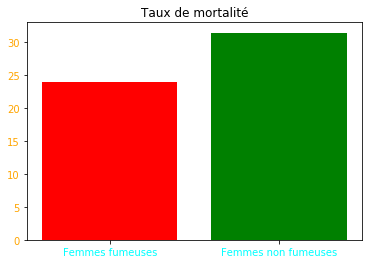

In [16]:
# Affichage sous la forme d'un graphe en barres dont la hauteur reflete des taux pour chacun des groupes. 
#
# Construire la série des valeurs pour la hauteur des barres :
HauteursDesBarres = [ToutesFumeusesConfonfues_TxMortalite,ToutesNonFumeusesConfonfues_TxMortalite]
# Construire la série des labels pour chacune des barres :
LabelsDesBarres = ('Femmes fumeuses', 'Femmes non fumeuses')
y_pos = np.arange(len(LabelsDesBarres))
# Creation du graphique en barres :
plt.bar(y_pos, HauteursDesBarres, color=['red', 'green'])

# Mise en forme des labels et marques sur  les axes horizontal et vertical :
plt.xticks(y_pos, LabelsDesBarres, color='cyan')
plt.yticks(color='orange')
plt.title('Taux de mortalité', fontdict=None, loc='center', pad=None)
plt.show()

Ainsi, il apparait que le taux de mortalité est plus élevé chez les femmes non-fumeuses que chez les femmes fumeuses !!??
C'est l'illustration du paradoxe de Simpson que l'on va maintenant analyser. 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

A partir de maintenant, on va  prendre en compte une variable qui n'a pas été explicitée jusqu'ici et qui introduit la confusion en influencant le résultat final : il s’agit de l’âge des personnes qui joue lui-aussi sur la mortalité.
Pour ce faire, on va répéter les opérations précédentes mais en opérant par tranches d'age ; 
on en choisit 4  : [18:34] ;  ]34:54] ; ]54:64] ; >64 ans .

## III - Pour chaque groupe (fumeuses , non fumeuses), le taux de mortalité est maintenant évalué par tranches d'age

In [17]:
print ("On reprend l'analyse en opérant dans la 1ere tranche d'age [AgeMin:34] ans :")

On reprend l'analyse en opérant dans la 1ere tranche d'age [AgeMin:34] ans :


In [18]:
femmes_TrA1 = OriginalInputData[OriginalInputData["Age"].between(int(AgeMin), 34)]
Nb_femmes_TrA1 = femmes_TrA1.shape[0]
print ("Nb de femmes dans la tranche d'age [",int(AgeMin),":34] = ",Nb_femmes_TrA1)

Nb de femmes dans la tranche d'age [ 18 :34] =  400


In [19]:
Fumeuses_TrA1 = femmes_TrA1.loc[femmes_TrA1['Smoker'] == 'Yes']
Nb_Fumeuses_TrA1 = Fumeuses_TrA1.shape[0]
Nb_NonFumeuses_TrA1 = Nb_femmes_TrA1 - Nb_Fumeuses_TrA1
print ("Dans la tranche d'age [",int(AgeMin),":34] : Nb Fumeuses=",Nb_Fumeuses_TrA1," vs  Nb NonFumeuses=",Nb_NonFumeuses_TrA1)

Dans la tranche d'age [ 18 :34] : Nb Fumeuses= 181  vs  Nb NonFumeuses= 219


In [20]:
FumeusesVivantes_TrA1 = femmes_TrA1.loc[(femmes_TrA1['Smoker'] == 'Yes') & (femmes_TrA1['Status'] == 'Alive')]
Nb_FumeusesVivantes_TrA1 = FumeusesVivantes_TrA1.shape[0]
Nb_FumeusesMortes_TrA1 = Nb_Fumeuses_TrA1 - Nb_FumeusesVivantes_TrA1
print ("Nb Fumeuses Mortes=",Nb_FumeusesMortes_TrA1," vs  Nb Fumeuses Vivantes=",Nb_FumeusesVivantes_TrA1)

Nb Fumeuses Mortes= 5  vs  Nb Fumeuses Vivantes= 176


In [21]:
NonFumeusesVivantes_TrA1 = femmes_TrA1.loc[(femmes_TrA1['Smoker'] == 'No') & (femmes_TrA1['Status'] == 'Alive')]
Nb_NonFumeusesVivantes_TrA1 = NonFumeusesVivantes_TrA1.shape[0]
Nb_NonFumeusesMortes_TrA1 = Nb_NonFumeuses_TrA1 - Nb_NonFumeusesVivantes_TrA1
print ("Nb Non Fumeuses Mortes=",Nb_NonFumeusesMortes_TrA1," vs  Nb Non Fumeuses Vivantes=",Nb_NonFumeusesVivantes_TrA1)

Nb Non Fumeuses Mortes= 6  vs  Nb Non Fumeuses Vivantes= 213


In [22]:
# Le taux de mortalité dans le groupe des femmes fumeuses dans la  la tranche d'age [18:34]  vaut :
Fumeuses_TrA1_TxMortalite = (Nb_FumeusesMortes_TrA1)/Nb_Fumeuses_TrA1 * 100
print ("Dans la tranche d'age [18:34] : le Taux de mortalite des fumeuses = % 4.2f " % Fumeuses_TrA1_TxMortalite)

Dans la tranche d'age [18:34] : le Taux de mortalite des fumeuses =  2.76 


In [23]:
# Le taux de mortalité dans le groupe des femmes Non fumeuses dans la  la tranche d'age [18:34]  vaut :
NonFumeuses_TrA1_TxMortalite = (Nb_NonFumeusesMortes_TrA1)/Nb_NonFumeuses_TrA1 * 100
print ("Dans la tranche d'age [18:34] : le Taux de mortalite des Non fumeuses = % 4.2f " % NonFumeuses_TrA1_TxMortalite)

Dans la tranche d'age [18:34] : le Taux de mortalite des Non fumeuses =  2.74 


In [24]:
table1 = {"Dans la tranche d'age [18:34]":  ['Femmes fumeuses', 'Femmes non fumeuses'],
            'Nb_Vivantes': [Nb_FumeusesVivantes_TrA1, Nb_NonFumeusesVivantes_TrA1],
            'Nb_Mortes': [Nb_FumeusesMortes_TrA1, Nb_NonFumeusesMortes_TrA1],
            'Mortalité en %': [Fumeuses_TrA1_TxMortalite, NonFumeuses_TrA1_TxMortalite]
           }
Resume1 = pd.DataFrame(table1, columns=["Dans la tranche d'age [18:34]", 'Nb_Vivantes','Nb_Mortes','Mortalité en %'])
print (Resume1)

  Dans la tranche d'age [18:34]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses          176          5        2.762431
1           Femmes non fumeuses          213          6        2.739726


In [25]:
print ("On reprend l'analyse en opérant dans la 2nde tranche d'age ]34:54] ans :")

On reprend l'analyse en opérant dans la 2nde tranche d'age ]34:54] ans :


In [26]:
femmes_TrA2 = OriginalInputData[OriginalInputData["Age"].between(float(34)+0.000001, 54)]
Nb_femmes_TrA2 = femmes_TrA2.shape[0]
print ("Nb de femmes dans la tranche d'age ]34:54] = ",Nb_femmes_TrA2)

Nb de femmes dans la tranche d'age ]34:54] =  436


In [27]:
Fumeuses_TrA2 = femmes_TrA2.loc[femmes_TrA2['Smoker'] == 'Yes']
Nb_Fumeuses_TrA2 = Fumeuses_TrA2.shape[0]
Nb_NonFumeuses_TrA2 = Nb_femmes_TrA2 - Nb_Fumeuses_TrA2
print ("Dans la tranche d'age ]34:54] : Nb Fumeuses=",Nb_Fumeuses_TrA2," vs  Nb NonFumeuses=",Nb_NonFumeuses_TrA2)

Dans la tranche d'age ]34:54] : Nb Fumeuses= 237  vs  Nb NonFumeuses= 199


In [28]:
FumeusesVivantes_TrA2 = femmes_TrA2.loc[(femmes_TrA2['Smoker'] == 'Yes') & (femmes_TrA2['Status'] == 'Alive')]
Nb_FumeusesVivantes_TrA2 = FumeusesVivantes_TrA2.shape[0]
Nb_FumeusesMortes_TrA2 = Nb_Fumeuses_TrA2 - Nb_FumeusesVivantes_TrA2
print ("Nb Fumeuses Mortes=",Nb_FumeusesMortes_TrA2," vs  Nb Fumeuses Vivantes=",Nb_FumeusesVivantes_TrA2)

Nb Fumeuses Mortes= 41  vs  Nb Fumeuses Vivantes= 196


In [29]:
NonFumeusesVivantes_TrA2 = femmes_TrA2.loc[(femmes_TrA2['Smoker'] == 'No') & (femmes_TrA2['Status'] == 'Alive')]
Nb_NonFumeusesVivantes_TrA2 = NonFumeusesVivantes_TrA2.shape[0]
Nb_NonFumeusesMortes_TrA2 = Nb_NonFumeuses_TrA2 - Nb_NonFumeusesVivantes_TrA2
print ("Nb Non Fumeuses Mortes=",Nb_NonFumeusesMortes_TrA2," vs  Nb Non Fumeuses Vivantes=",Nb_NonFumeusesVivantes_TrA2)

Nb Non Fumeuses Mortes= 19  vs  Nb Non Fumeuses Vivantes= 180


In [30]:
# Le taux de mortalité dans le groupe des femmes fumeuses dans la  la tranche d'age ]34:54]  vaut :
Fumeuses_TrA2_TxMortalite = (Nb_FumeusesMortes_TrA2)/Nb_Fumeuses_TrA2 * 100
print ("Dans la tranche d'age ]34:54] : le Taux de mortalite des fumeuses = % 4.2f " % Fumeuses_TrA2_TxMortalite)

Dans la tranche d'age ]34:54] : le Taux de mortalite des fumeuses =  17.30 


In [31]:
# Le taux de mortalité dans le groupe des femmes Non fumeuses dans la  la tranche d'age ]34:54]  vaut :
NonFumeuses_TrA2_TxMortalite = (Nb_NonFumeusesMortes_TrA2)/Nb_NonFumeuses_TrA2 * 100
print ("Dans la tranche d'age ]34:54] : le Taux de mortalite des Non fumeuses = % 4.2f " % NonFumeuses_TrA2_TxMortalite)

Dans la tranche d'age ]34:54] : le Taux de mortalite des Non fumeuses =  9.55 


In [32]:
table2 = {"Dans la tranche d'age ]34:54]":  ['Femmes fumeuses', 'Femmes non fumeuses'],
            'Nb_Vivantes': [Nb_FumeusesVivantes_TrA2, Nb_NonFumeusesVivantes_TrA2],
            'Nb_Mortes': [Nb_FumeusesMortes_TrA2, Nb_NonFumeusesMortes_TrA2],
            'Mortalité en %': [Fumeuses_TrA2_TxMortalite, NonFumeuses_TrA2_TxMortalite]
           }
Resume2 = pd.DataFrame(table2, columns=["Dans la tranche d'age ]34:54]", 'Nb_Vivantes','Nb_Mortes','Mortalité en %'])
print (Resume2)

  Dans la tranche d'age ]34:54]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses          196         41       17.299578
1           Femmes non fumeuses          180         19        9.547739


In [33]:
print ("On reprend l'analyse en opérant dans la 3eme tranche d'age ]54:64] ans :")

On reprend l'analyse en opérant dans la 3eme tranche d'age ]54:64] ans :


In [34]:
femmes_TrA3 = OriginalInputData[OriginalInputData["Age"].between(float(54)+0.000001, 64)]
Nb_femmes_TrA3 = femmes_TrA3.shape[0]
print ("Nb de femmes dans la tranche d'age ]54:64] = ",Nb_femmes_TrA3)

Nb de femmes dans la tranche d'age ]54:64] =  236


In [35]:
Fumeuses_TrA3 = femmes_TrA3.loc[femmes_TrA3['Smoker'] == 'Yes']
Nb_Fumeuses_TrA3 = Fumeuses_TrA3.shape[0]
Nb_NonFumeuses_TrA3 = Nb_femmes_TrA3 - Nb_Fumeuses_TrA3
print ("Dans la tranche d'age ]54:64] : Nb Fumeuses=",Nb_Fumeuses_TrA3," vs  Nb NonFumeuses=",Nb_NonFumeuses_TrA3)

Dans la tranche d'age ]54:64] : Nb Fumeuses= 115  vs  Nb NonFumeuses= 121


In [36]:
FumeusesVivantes_TrA3 = femmes_TrA3.loc[(femmes_TrA3['Smoker'] == 'Yes') & (femmes_TrA3['Status'] == 'Alive')]
Nb_FumeusesVivantes_TrA3 = FumeusesVivantes_TrA3.shape[0]
Nb_FumeusesMortes_TrA3 = Nb_Fumeuses_TrA3 - Nb_FumeusesVivantes_TrA3
print ("Nb Fumeuses Mortes=",Nb_FumeusesMortes_TrA3," vs  Nb Fumeuses Vivantes=",Nb_FumeusesVivantes_TrA3)

Nb Fumeuses Mortes= 51  vs  Nb Fumeuses Vivantes= 64


In [37]:
NonFumeusesVivantes_TrA3 = femmes_TrA3.loc[(femmes_TrA3['Smoker'] == 'No') & (femmes_TrA3['Status'] == 'Alive')]
Nb_NonFumeusesVivantes_TrA3 = NonFumeusesVivantes_TrA3.shape[0]
Nb_NonFumeusesMortes_TrA3 = Nb_NonFumeuses_TrA3 - Nb_NonFumeusesVivantes_TrA3
print ("Nb Non Fumeuses Mortes=",Nb_NonFumeusesMortes_TrA3," vs  Nb Non Fumeuses Vivantes=",Nb_NonFumeusesVivantes_TrA3)

Nb Non Fumeuses Mortes= 40  vs  Nb Non Fumeuses Vivantes= 81


In [38]:
# Le taux de mortalité dans le groupe des femmes fumeuses dans la tranche d'age ]54:64]  vaut :
Fumeuses_TrA3_TxMortalite = (Nb_FumeusesMortes_TrA3)/Nb_Fumeuses_TrA3 * 100
print ("Dans la tranche d'age ]54:64] : le Taux de mortalite des fumeuses = % 4.2f " % Fumeuses_TrA3_TxMortalite)

Dans la tranche d'age ]54:64] : le Taux de mortalite des fumeuses =  44.35 


In [39]:
# Le taux de mortalité dans le groupe des femmes Non fumeuses dans la  la tranche d'age ]54:64]  vaut :
NonFumeuses_TrA3_TxMortalite = (Nb_NonFumeusesMortes_TrA3)/Nb_NonFumeuses_TrA3 * 100
print ("Dans la tranche d'age ]54:64] : le Taux de mortalite des Non fumeuses = % 4.2f " % NonFumeuses_TrA3_TxMortalite)

Dans la tranche d'age ]54:64] : le Taux de mortalite des Non fumeuses =  33.06 


In [40]:
table3 = {"Dans la tranche d'age ]54:64]":  ['Femmes fumeuses', 'Femmes non fumeuses'],
            'Nb_Vivantes': [Nb_FumeusesVivantes_TrA3, Nb_NonFumeusesVivantes_TrA3],
            'Nb_Mortes': [Nb_FumeusesMortes_TrA3, Nb_NonFumeusesMortes_TrA3],
            'Mortalité en %': [Fumeuses_TrA3_TxMortalite, NonFumeuses_TrA3_TxMortalite]
           }
Resume3 = pd.DataFrame(table3, columns=["Dans la tranche d'age ]54:64]", 'Nb_Vivantes','Nb_Mortes','Mortalité en %'])
print (Resume3)

  Dans la tranche d'age ]54:64]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses           64         51       44.347826
1           Femmes non fumeuses           81         40       33.057851


In [41]:
print ("On reprend l'analyse en opérant dans la 4eme tranche d'age ]64:AgeMax] ans :")

On reprend l'analyse en opérant dans la 4eme tranche d'age ]64:AgeMax] ans :


In [42]:
femmes_TrA4 = OriginalInputData[OriginalInputData["Age"].between(float(64)+0.000001, int(AgeMax)+1)]
Nb_femmes_TrA4 = femmes_TrA4.shape[0]
print ("Nb de femmes dans la tranche d'age ]64:",int(AgeMax),"] = ",Nb_femmes_TrA4)

Nb de femmes dans la tranche d'age ]64: 89 ] =  242


In [43]:
Fumeuses_TrA4 = femmes_TrA4.loc[femmes_TrA4['Smoker'] == 'Yes']
Nb_Fumeuses_TrA4 = Fumeuses_TrA4.shape[0]
Nb_NonFumeuses_TrA4 = Nb_femmes_TrA4 - Nb_Fumeuses_TrA4
print ("Dans la tranche d'age ]64",int(AgeMax),"] : Nb Fumeuses=",Nb_Fumeuses_TrA4," vs  Nb NonFumeuses=",Nb_NonFumeuses_TrA4)

Dans la tranche d'age ]64 89 ] : Nb Fumeuses= 49  vs  Nb NonFumeuses= 193


In [44]:
FumeusesVivantes_TrA4 = femmes_TrA4.loc[(femmes_TrA4['Smoker'] == 'Yes') & (femmes_TrA4['Status'] == 'Alive')]
Nb_FumeusesVivantes_TrA4 = FumeusesVivantes_TrA4.shape[0]
Nb_FumeusesMortes_TrA4 = Nb_Fumeuses_TrA4 - Nb_FumeusesVivantes_TrA4
print ("Nb Fumeuses Mortes=",Nb_FumeusesMortes_TrA4," vs  Nb Fumeuses Vivantes=",Nb_FumeusesVivantes_TrA4)

Nb Fumeuses Mortes= 42  vs  Nb Fumeuses Vivantes= 7


In [45]:
NonFumeusesVivantes_TrA4 = femmes_TrA4.loc[(femmes_TrA4['Smoker'] == 'No') & (femmes_TrA4['Status'] == 'Alive')]
Nb_NonFumeusesVivantes_TrA4 = NonFumeusesVivantes_TrA4.shape[0]
Nb_NonFumeusesMortes_TrA4 = Nb_NonFumeuses_TrA4 - Nb_NonFumeusesVivantes_TrA4
print ("Nb Non Fumeuses Mortes=",Nb_NonFumeusesMortes_TrA4," vs  Nb Non Fumeuses Vivantes=",Nb_NonFumeusesVivantes_TrA4)

Nb Non Fumeuses Mortes= 165  vs  Nb Non Fumeuses Vivantes= 28


In [46]:
# Le taux de mortalité dans le groupe des femmes fumeuses dans la tranche d'age ]64:AgeMax]  vaut :
Fumeuses_TrA4_TxMortalite = (Nb_FumeusesMortes_TrA4)/Nb_Fumeuses_TrA4 * 100
print ("Dans la tranche d'age ]64",int(AgeMax),"] : le Taux de mortalite des fumeuses = % 4.2f " % Fumeuses_TrA4_TxMortalite)

Dans la tranche d'age ]64 89 ] : le Taux de mortalite des fumeuses =  85.71 


In [47]:
# Le taux de mortalité dans le groupe des femmes Non fumeuses dans la tranche d'age ]64:AgeMax]  vaut :
NonFumeuses_TrA4_TxMortalite = (Nb_NonFumeusesMortes_TrA4)/Nb_NonFumeuses_TrA4 * 100
print ("Dans la tranche d'age ]64",int(AgeMax),"] : le Taux de mortalite des Non fumeuses = % 4.2f " % NonFumeuses_TrA4_TxMortalite)

Dans la tranche d'age ]64 89 ] : le Taux de mortalite des Non fumeuses =  85.49 


In [48]:
table4 = {"Dans la tranche d'age ]64:89]":  ['Femmes fumeuses', 'Femmes non fumeuses'],
            'Nb_Vivantes': [Nb_FumeusesVivantes_TrA4, Nb_NonFumeusesVivantes_TrA4],
            'Nb_Mortes': [Nb_FumeusesMortes_TrA4, Nb_NonFumeusesMortes_TrA4],
            'Mortalité en %': [Fumeuses_TrA4_TxMortalite, NonFumeuses_TrA4_TxMortalite]
           }
Resume4 = pd.DataFrame(table4, columns=["Dans la tranche d'age ]64:89]", 'Nb_Vivantes','Nb_Mortes','Mortalité en %'])
print (Resume4)

  Dans la tranche d'age ]64:89]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses            7         42       85.714286
1           Femmes non fumeuses           28        165       85.492228


### Resumons la partie III à l'aide des tableaux 1 à 4,  et à l'aide d'un graphe en barres dont la hauteur reflete des taux de mortalité pour chacun des groupes

In [49]:
print (Resume1)
print (Resume2)
print (Resume3)
print (Resume4)

  Dans la tranche d'age [18:34]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses          176          5        2.762431
1           Femmes non fumeuses          213          6        2.739726
  Dans la tranche d'age ]34:54]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses          196         41       17.299578
1           Femmes non fumeuses          180         19        9.547739
  Dans la tranche d'age ]54:64]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses           64         51       44.347826
1           Femmes non fumeuses           81         40       33.057851
  Dans la tranche d'age ]64:89]  Nb_Vivantes  Nb_Mortes  Mortalité en %
0               Femmes fumeuses            7         42       85.714286
1           Femmes non fumeuses           28        165       85.492228


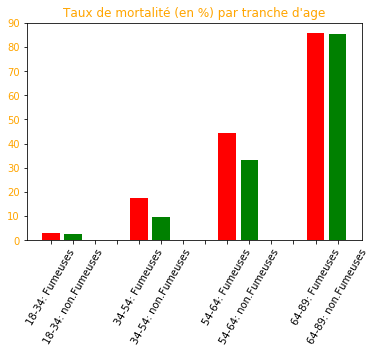

In [50]:
# Construire la série des valeurs pour la hauteur des barres :
HauteursDesBarres = [Fumeuses_TrA1_TxMortalite,NonFumeuses_TrA1_TxMortalite,
                     0,0, #  pour écarter les tranches 1 et 2
                     Fumeuses_TrA2_TxMortalite,NonFumeuses_TrA2_TxMortalite,
                     0,0, #  pour écarter les tranches 2 et 3
                     Fumeuses_TrA3_TxMortalite,NonFumeuses_TrA3_TxMortalite,
                     0,0,  #  pour écarter les tranches 3 et 4
                     Fumeuses_TrA4_TxMortalite,NonFumeuses_TrA4_TxMortalite]
# Construire la série des labels pour chacune des barres :
LabelsDesBarres = ('18-34: Fumeuses', '18-34: non.Fumeuses',
                   '','',   #  pour écarter les tranches 1 et 2
                   '34-54: Fumeuses', '34-54: non.Fumeuses',
                   '','',   #  pour écarter les tranches 2 et 3
                   '54-64: Fumeuses', '54-64: non.Fumeuses',
                   '','',   #  pour écarter les tranches 3 et 4
                   '64-89: Fumeuses', '64-89: non.Fumeuses')
# Choisir la position (? la largeur ?) pour chacune des barres
barres_position = np.arange(len(LabelsDesBarres))
# ??? barres_largeur = [0.1,0.3,3.0,3.5]
#
# Creation du graphique en barres :
plt.bar(barres_position, HauteursDesBarres, color=['red','green','red', 'green','red','green','red','green','red', 'green','red','green','red','green'])
# ??? plt.bar(barres_position, HauteursDesBarres, width=barres_largeur, color=['red','green','red', 'green','red','green','red','green','red', 'green','red','green','red','green'])
#
# Mise en forme des labels et marques sur  les axes horizontal et vertical :
plt.xticks(barres_position, LabelsDesBarres, color='black', rotation=60)
plt.yticks(color='orange')
plt.title("Taux de mortalité (en %) par tranche d'age", fontdict=None, loc='center', pad=None, color='orange')
plt.show()

Les tableaux 'ResumeX' et le graphique montrant le taux de mortalité par tranche d'age permet de conclure que le tabac constitue un facteur de mortalité .

## IV - Prolongement de l'activité avec une regression logistique 

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, on peut essayer de réaliser d'autres analyse (par exemple, une régression logistique). 
Le but est d'analyser ''la corrrélation'' entre les 2 variables 'Mortalité' et  'Age' pour étudier la probabilité de décès en fonction de l'âge, et ceci  selon que l'on considère le groupe des fumeuses ou des non fumeuses. 

Avertissements : 
*  la régression logistique porte assez mal son nom , car il ne s’agit pas à proprement parler d’une régression au sens classique du terme (on essaye pas d’expliquer une variable quantitative mais de classer des individus dans deux catégories). 
*  par ailleurs, la fonction LogisticRegression de Scikit Learn ne fournit pas les valeurs p-value et les intervalles de confiance pour les coefficients du modele, meme si cela est theoriquement possible de les avoir  si la regression est appliquée sans penalisation ; il faut privilégier l'utilisation de la fonction de la librairie "statsmodels".

In [65]:
import statsmodels.api as sm

In [52]:
# Rappel :  OriginalInputData = pd.read_csv("../__DataSets/module3_Practical_session_Subject6_smoking.csv")
OriginalInputData.head(10) 

Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4
5     No  Alive  36.8
6     No  Alive  23.8
7    Yes   Dead  57.5
8    Yes  Alive  24.8
9    Yes  Alive  49.5

### IV - A/ Operons une Regression Logistique sur l'ensemble des 2 groupes (fumeuses + non fumeuses)

In [53]:
# Pour la suite, stockage dans des DataFrames separes  pour les Fumeuses et pour les NonFumeuses. 
# Creation de Y_pourEtudeMortaliteFumeuses et Y_pourEtudeMortaliteNonFumeuses en comptant >0  (resp. <0) si 'Dead' (si 'Alive')   
# convertion des valeurs de la colonne 'Smoker' qui valent 'Yes' ou 'No'  en entiers 1 ou 0 
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
X = pd.DataFrame()
Y = pd.DataFrame()
X_pourEtudeMortaliteFumeuses = pd.DataFrame()  
X_pourEtudeMortaliteNonFumeuses = pd.DataFrame()
Y_pourEtudeMortaliteFumeuses = pd.DataFrame()  
Y_pourEtudeMortaliteNonFumeuses = pd.DataFrame()
countF = 0
countNF = 0
sommeDesYi = 0
NbDecesChezFumeuses = 0
NbDecesChezNonFumeuses = 0
taille1Colonne = OriginalInputData['Smoker'].shape[0]  # devrait etre egal à 1314
for i in range(taille1Colonne) :
    if OriginalInputData.loc[i,'Smoker'] == 'Yes' : 
        X.loc[i,'Smoker'] = 1   #   conversion en entier
        X_pourEtudeMortaliteFumeuses.loc[countF,'Smoker'] = 1 
        X_pourEtudeMortaliteFumeuses.loc[countF,'Age'] = OriginalInputData.loc[i,'Age'] / AgeMax
        if OriginalInputData.loc[i,'Status'] == 'Dead' :  
           Y_pourEtudeMortaliteFumeuses.loc[countF,'Status'] = 1  # la caracteristque Death est comptée POSITIVEMENT
           NbDecesChezFumeuses += 1
        else : 
           Y_pourEtudeMortaliteFumeuses.loc[countF,'Status'] = 0  # comptée nulle  plutot que NEGATIVEMENT
        countF += 1
    else :    
        X.loc[i,'Smoker'] = 0  #   conversion en entier
        X_pourEtudeMortaliteNonFumeuses.loc[countNF,'Smoker'] = 0
        X_pourEtudeMortaliteNonFumeuses.loc[countNF,'Age'] = OriginalInputData.loc[i,'Age'] / AgeMax
        if OriginalInputData.loc[i,'Status'] == 'Dead' :
           Y_pourEtudeMortaliteNonFumeuses.loc[countNF,'Status'] = 1
           NbDecesChezNonFumeuses += 1
        else : 
           Y_pourEtudeMortaliteNonFumeuses.loc[countNF,'Status'] = 0  
        countNF += 1
    X.loc[i,'Age'] = OriginalInputData.loc[i,'Age'] / AgeMax   #   si on veut avoir les ages dans l'intervalle [0:1]
    if OriginalInputData.loc[i,'Status'] == 'Dead' :
        Y.loc[i,'Status'] = 1
    else :
        Y.loc[i,'Status'] = 0
    sommeDesYi += Y.loc[i,'Status'] 
print ("verification : finalement  countF=",X_pourEtudeMortaliteFumeuses.shape[0],"  ?  ",Nb_Fumeuses)
print ("verification : finalement  countNF=",X_pourEtudeMortaliteNonFumeuses.shape[0],"  ?  ",Nb_NonFumeuses)
print ("NbDecesChezFumeuses=",NbDecesChezFumeuses)
print ("NbDecesChezNonFumeuses=",NbDecesChezNonFumeuses)

verification : finalement  countF= 582   ?   582
verification : finalement  countNF= 732   ?   732
NbDecesChezFumeuses= 139
NbDecesChezNonFumeuses= 230


In [54]:
X_pourEtudeMortaliteFumeuses.describe()

Smoker         Age
count   582.0  582.000000
mean      1.0    0.492433
std       0.0    0.180399
min       1.0    0.200222
25%       1.0    0.348165
50%       1.0    0.479422
75%       1.0    0.624861
max       1.0    0.992214

In [55]:
X_pourEtudeMortaliteNonFumeuses.describe()

Smoker         Age
count   732.0  732.000000
mean      0.0    0.554125
std       0.0    0.232462
min       0.0    0.200222
25%       0.0    0.348999
50%       0.0    0.538376
75%       0.0    0.732481
max       0.0    1.000000

Remarque : la comparaison des estimations de l'age moyen des 2 groupes est une 1ere indication

In [56]:
print ("verif : somme des valeurs dans la colonne 'Smoker' = ",X['Smoker'].sum())

verif : somme des valeurs dans la colonne 'Smoker' =  582.0


In [57]:
# Vérifions le contenu de la sous-liste de données  qui contient 2 données binaires 'Dead' ou 'Alive' :
X.head(5)   # Y.describe()

Smoker       Age
0     1.0  0.233593
1     1.0  0.214683
2     0.0  0.639600
3     0.0  0.523915
4     1.0  0.905451

In [58]:
# Vérifions le contenu de la sous-liste de données  qui contient 2 données binaires 'Dead' ou 'Alive' :
Y.head(5)  # Y.describe()

Status
0     0.0
1     0.0
2     1.0
3     0.0
4     0.0

Avertissement : 
*  SciKit-Learn décide par défaut d’appliquer une régularisation sur le modèle. 
*  Dans le modèle que l'on va utiliser, on applique une pénalité de type 'l2' et on prend un solver du type Newton qui est le plus classique pour la régression logistique.

#### * Appliquons le modele de Regression Logistique de 'scikit learn' sur l'ensemble des 2 groupes Fumeuses et Non Fumeuses :

In [59]:
print ("verif : somme des valeurs dans la colonne Y = ",sommeDesYi)

verif : somme des valeurs dans la colonne Y =  369.0


In [60]:
# Rappel : la variable 'Smoker' represente ici A LA FOIS les fumeuses et non-fumeuses !!
if  abs(sommeDesYi) == 0 :   #  on verifie que Y contient plus de 1 classe
    print ("Probleme : la somme sommeDesYi = ",sommeDesYi,"  devrait être différente de 0 !")
    print ("           les valeurs de Y ne composent qu'une seule classe !")
else :  #  La regression logistique peut être effectuée :
    SKL_MRL_A = LogisticRegression(penalty='l2',solver='newton-cg')
    SKL_MRL_A.fit(X,Y)

NameError: name 'LogisticRegression' is not defined

In [61]:
# Afficher la valeur des coefficients pour ce modele : 
SKL_MRL_A.coef_

NameError: name 'SKL_MRL_A' is not defined

La valeur du 1er coeff indique l'intensité de la probabilité de la mortalité en fonction de la caractéristique Tabagisme
La valeur du 2nd coeff indique l'intensité de la probabilité de la mortalité en fonction de la caractéristique Age

In [62]:
# Si souhaité, afficher dans un DataFrame les coefficients du modèle , avec la constante :
#pd.DataFrame(np.concatenate([SKL_MRL_A.intercept_.reshape(-1,1),
#                            SKL_MRL_A.coef_],axis=1),
#            index = ["coef"],
#            columns = ["constante"]+list(X.columns)).T

In [63]:
score__SKL_MRL_A = SKL_MRL_A.score(X,Y)
print ("Regression Logistique de SciKitLearn sur l'ensemble des 2 groupes fumeuses + non-fumeuses : score= %5.3f" %score__SKL_MRL_A)

NameError: name 'SKL_MRL_A' is not defined

#### * Appliquons le modele de Regression Logistique de 'statsmodels'  sur l'ensemble des 2 groupes Fumeuses et Non Fumeuses : 

Attention : 
par defaut, le modele de regression logistique de 'statsmodels' n'inclue pas d'interception avec une valeur cte ;
pour inclure cette option d'interception dans le modele,  
utiliser l'instruction 'statsmodels.tools.add_constant' pour ajouter la constant dans la matrice  X
( Remarque : pour comprendre l'utilité et la mise en oeuvre de cette notion, voir le lien suivant :
https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept )

In [66]:
MLRavecSM_A = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.629624
         Iterations 5


In [67]:
# MLRavecSM_A.params
MLRavecSM_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1312
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                -0.06046
Time:                        15:00:55   Log-Likelihood:                -827.33
converged:                       True   LL-Null:                       -780.16
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Smoker        -1.1611      0.114    -10.206      0.000      -1.384      -0.938
Age            0.0040      0.120      0.034      0.973      -0.231       0.239
==============================================================================
"""

### IV - B/  Operons une Regression Logistique sur le groupe des fumeuses 

In [68]:
# Commencons par vérifier le contenu de X_pourEtudeMortaliteFumeuses et Y_pourEtudeMortaliteFumeuses
X_pourEtudeMortaliteFumeuses.describe()
#X_pourEtudeMortaliteFumeuses.head(10)

Smoker         Age
count   582.0  582.000000
mean      1.0    0.492433
std       0.0    0.180399
min       1.0    0.200222
25%       1.0    0.348165
50%       1.0    0.479422
75%       1.0    0.624861
max       1.0    0.992214

In [69]:
Y_pourEtudeMortaliteFumeuses.describe()
# Y_pourEtudeMortaliteFumeuses.head(10)

Status
count  582.000000
mean     0.238832
std      0.426736
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

In [70]:
taille1Colonne = X_pourEtudeMortaliteFumeuses['Age'].shape[0]  # devrait etre egal à 582
print ("taille1Colonne=",taille1Colonne)

taille1Colonne= 582


In [71]:
print ("verif : Nbre de deces chez les Fumeuses = ",NbDecesChezFumeuses,"  VS  Nb_Fumeuses=",Nb_Fumeuses)

verif : Nbre de deces chez les Fumeuses =  139   VS  Nb_Fumeuses= 582


#### * Appliquons le modele de Regression Logistique de 'scikit learn' sur le groupe des Fumeuses  :

In [72]:
if  ( abs(NbDecesChezFumeuses) == 0 ):   #  on verifie que Y_pourEtudeMortaliteFumeuses contient plus de 1 classe
    print ("Probleme : la somme Y_pourEtudeMortaliteFumeuses.sum()  devrait être différente de 0 !")
    print ("           les valeurs de Y_pourEtudeMortaliteFumeuses ne composent qu'une seule classe !")
else :  #  La regression logistique peut être effectuée :
    SKL_MRL_B = LogisticRegression(penalty='l2',solver='newton-cg')
    SKL_MRL_B.fit(X_pourEtudeMortaliteFumeuses, Y_pourEtudeMortaliteFumeuses)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Afficher la valeur des coefficients pour ce modele : 
SKL_MRL_B.coef_

In [ ]:
score__SKL_MRL_B = SKL_MRL_B.score(X_pourEtudeMortaliteFumeuses,Y_pourEtudeMortaliteFumeuses)
print ("Modele de Regression Logistique sur le groupe des Fumeuses : score = %5.3f" %score__SKL_MRL_B)

#### * Appliquons le modele de Regression Logistique de 'statsmodels' sur le groupe des Fumeuses  :

In [73]:
MLRavecSM_B = sm.Logit(Y_pourEtudeMortaliteFumeuses, X_pourEtudeMortaliteFumeuses).fit()

Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7


In [74]:
MLRavecSM_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  582
Model:                          Logit   Df Residuals:                      580
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                  0.2492
Time:                        15:01:14   Log-Likelihood:                -240.21
converged:                       True   LL-Null:                       -319.94
Covariance Type:            nonrobust   LLR p-value:                 1.477e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Smoker        -5.5081      0.466    -11.814      0.000      -6.422      -4.594
Age            7.9990      0.784     10.203      0.000       6.462       9.536
==============================================================================
"""

### IV - C/  Operons une Regression Logistique sur le groupe des non fumeuses 

In [75]:
print ("verif : Nbre de deces chez les Non Fumeuses = ",NbDecesChezNonFumeuses,"  VS  Nb_NonFumeuses=",Nb_NonFumeuses)

verif : Nbre de deces chez les Non Fumeuses =  230   VS  Nb_NonFumeuses= 732


#### * Appliquons le modele de Regression Logistique de 'scikit learn' sur le groupe des Non Fumeuses  :

In [76]:
if  abs(NbDecesChezNonFumeuses) == 0 :   #  on verifie que Y_pourEtudeMortaliteNonFumeuses contient plus de 1 classe
    print ("Probleme : la somme Y_pourEtudeMortaliteNonFumeuses.sum()  devrait être différente de 0 !")
    print ("           les valeurs de Y_pourEtudeMortaliteNonFumeuses ne composent qu'une seule classe !")
else :  #  La regression logistique peut être effectuée :
    SKL_MRL_C = LogisticRegression(penalty='l2',solver='newton-cg')
    SKL_MRL_C.fit(X_pourEtudeMortaliteNonFumeuses,Y_pourEtudeMortaliteNonFumeuses)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Afficher la valeur des coefficients pour ce modele : 
SKL_MRL_C.coef_

Rappelons que la valeur du 1er coeff indique l'intensité de la probabilité de la mortalité en fonction de la caractéristique Tabagisme ; tandis que la valeur du 2nd coeff indique l'intensité de la probabilité de la mortalité en fonction de la caractéristique Age

On note le coeff nul pour la probabilité de la mortalité en fonction de la caractéristique Tabagisme: ce qui est un résultat attendu , puisqu'il s'agit du groupe des non fumeuses ; 
tout se passe comme si la mortalité était seulement le fait de l'age (aucune autre cause n'étant considérée ici).

In [ ]:
score__SKL_MRL_C = SKL_MRL_C.score(X_pourEtudeMortaliteNonFumeuses,Y_pourEtudeMortaliteNonFumeuses)
print ("Modele de Regression Logistique sur le groupe des Non Fumeuses : score = %5.3f" %score__SKL_MRL_C)

#### * Appliquons le modele de Regression Logistique de 'statsmodels' sur le groupe des  Non Fumeuses  :

In [77]:
MLRavecSM_C = sm.Logit(Y_pourEtudeMortaliteNonFumeuses, X_pourEtudeMortaliteNonFumeuses).fit() 
# Mais erreur de type 'Singular Matrix Error' !
# voir  https://stackoverflow.com/questions/20703733/logit-regression-and-singular-matrix-error-in-python
# En fait cette erreur est due au fait que 
# tout se passe comme s'il y a redondance entre les 2 caractéristiques 'Age' et 'Mortalité' .

Optimization terminated successfully.
         Current function value: 0.687904
         Iterations 4


LinAlgError: Singular matrix

In [78]:
MLRavecSM_C.summary()

NameError: name 'MLRavecSM_C' is not defined

### IV - D/ Résumé des essais de  régression logistique :

#### Construisons  un tableau des observations :

In [79]:
tableMRL = {"Groupes":  ['femmes fumeuses et non', 'femmes fumeuses', 'femmes non fumeuses'],
            'Nb_Vivantes': [Nb_FumeusesVivantes+Nb_NonFumeusesVivantes, Nb_FumeusesVivantes, Nb_NonFumeusesVivantes],
            'Nb_Mortes': [Nb_FumeusesMortes+Nb_NonFumeusesMortes,Nb_FumeusesMortes, Nb_NonFumeusesMortes],
            'Score_Mod.Regr.Logistique':[score__SKL_MRL_A, score__SKL_MRL_B, score__SKL_MRL_C]
           }
ResumeMRL = pd.DataFrame(tableMRL, columns=["Groupes", 'Nb_Vivantes','Nb_Mortes','Score_Mod.Regr.Logistique'])
print (ResumeMRL)

NameError: name 'score__SKL_MRL_A' is not defined

#### Commentons :

Commençons par rappeler que le même modele de régression logistique (de base mais très classique, sans inclure d'interception avec une constante, issu des librairies "scikit learn" d'une part "statmodels" d'autre part) a été utilisé pour les 3 types de groupes, en considérant tous ensemble les différents ages (afin de s'affranchir d'un biais induit par des regroupements en tranches d'âges arbitraires et non régulières) ; et que le score reflète la capacité de ce modèle de régression logistique à prédire la mortalité en fonction de l'age.
        
De façon différente mais cohérente avec l'utilisation du modele de Regression Logistique issu de la librairie "scikit learn",   les performances dans l'optimization (fit) du modele de Regression Logistique issu de la librairie "statmodels" terminée avec succes sont rappelées ci-dessous  pour les 2 groupes traités séparemment :
 * Fumeuses    : en 7 itérations : score~0.81, valeur de la fonction ~0.41 , coef probabilité Mortalité avec l'Age = 5.37
 * NonFumeuses : en 4 itérations : score~0.87, valeur de la fonction ~0.69 , coef probabilité Mortalité avec l'Age = 7.04
(remarque :  les coefficients de probabilté entre les variables 'Age' et 'Status' sont normalement positifs car ils reflètent le fait que l'on a compté POSITIVEMENT la mortalité ; or celle-ci augmente avec l'age). 

Les scores 'TRAINING r_score' (cf la partie V) qui refletent les performances dans l'optimization (fit) du modele de Regression Linéaire confirment les observations et interpretations faites avec les essais de Regression Logistique.

Ceci s'interprete par le fait que, par-rapport aux femmes non fumeuses, les fumeuses ont une probalité plus grande de mourir en raison d'un autre facteur que l'age ; étant donné que dans cette étude , ne sont pris en compte que 2 facteurs explicatifs de la mortalité: le tabagisme et l'age, ces régressions logistiques permettent de conclure sur la nocivité du tabagisme.

## V - Prolongement  avec un essai de Regression Linéaire séparemment sur les 2 groupes

In [ ]:
# Creation d'une fonction qui pourra etre appelée plusieurs fois : 
def buildLinearRegressionModel(X, Y):
    # step_2 = build a LinearRegression model on the subset of TRAINING data , and show its performance-score :
    from sklearn.linear_model import LinearRegression
    linearModel = LinearRegression(normalize=True).fit(X, Y)
    linearModel_trainingScore = linearModel.score(X, Y)
    print ("LinearRegressionModel : TRAINING r_score = ",linearModel_trainingScore)
    #
    return (linearModel_trainingScore)

In [ ]:
# Testons le modele de Regression lineaire  'Statut Vivante_ou_Morte'  VS  'Age'  chez les Fumeuses :
linearModel_trainingScore = buildLinearRegressionModel(X_pourEtudeMortaliteFumeuses,Y_pourEtudeMortaliteFumeuses)

In [ ]:
# Testons le modele de Regression lineaire  'Statut Vivante_ou_Morte'  VS  'Age' chez les Non Fumeuses:
linearModel_trainingScore = buildLinearRegressionModel(X_pourEtudeMortaliteNonFumeuses,Y_pourEtudeMortaliteNonFumeuses)

Sans donner d'explication sur la mise en oeuvre de cet autre modèle qui est appliqué à l'identique aux 2 groupes de femmes,
ni sur la qualité toute relative des scores obtenus, 
on retrouve l'observation faite précédemment avec la regression logistique : à savoir,  la probabilité de décès en fonction de l'âge pour le groupe des femmes non fumeuses est plus élevée  que cette probabilité pour le groupe des fumeuses.

## VI - Prolongement  avec un calcul des corrélations séparemment sur les 2 groupes

In [ ]:
print ("Correlations entre les variables pour les données concernant seulement le groupe des Fumeuses :")
DataConcatenee = X_pourEtudeMortaliteFumeuses.drop(['Smoker'], axis=1)
DataConcatenee['Status'] = Y_pourEtudeMortaliteFumeuses  #  on ajoute la colonne 'Status'
# DataConcatenee # pour vérifier
Fumeuses_Corrs = DataConcatenee.corr()
Fumeuses_Corrs

In [ ]:
print ("Correlations entre les variables pour les données concernant seulement le groupe des Non Fumeuses :")
DataConcatenee = X_pourEtudeMortaliteNonFumeuses.drop(['Smoker'], axis=1)                       
DataConcatenee['Status'] = Y_pourEtudeMortaliteNonFumeuses  #  on ajoute la colonne 'Status'
# DataConcatenee # pour vérifier
NonFumeuses_Corrs = DataConcatenee.corr()
NonFumeuses_Corrs

Sans explication sur l'application à l'identique aux 2 groupes de femmes ni sur la qualité relative des coefficients de correlation obtenus,
on retrouve l'observation faite précédemment avec les modèles de regression : à savoir,  la corrélation entre les 2 variables  [mortalité]  et [âge]   est plus forte pour le groupe des femmes non fumeuses que pour le groupe des fumeuses. 